### ***Loading The Data***

In [1]:
import pandas as pd
import numpy as np
from my_custom_utils import data_preparation,important_features_visualization_classifier,feature_selection_classifier

In [2]:
df=pd.read_csv('Copy of Depression and Happiness Factor Analysis.csv')

In [3]:
#df.head()

In [4]:
df.shape

(920, 21)

### ***Data Preparation***

In [5]:
data_final=data_preparation(df)

In [6]:
data_final.shape

(920, 18)

### ***Feature Selection***

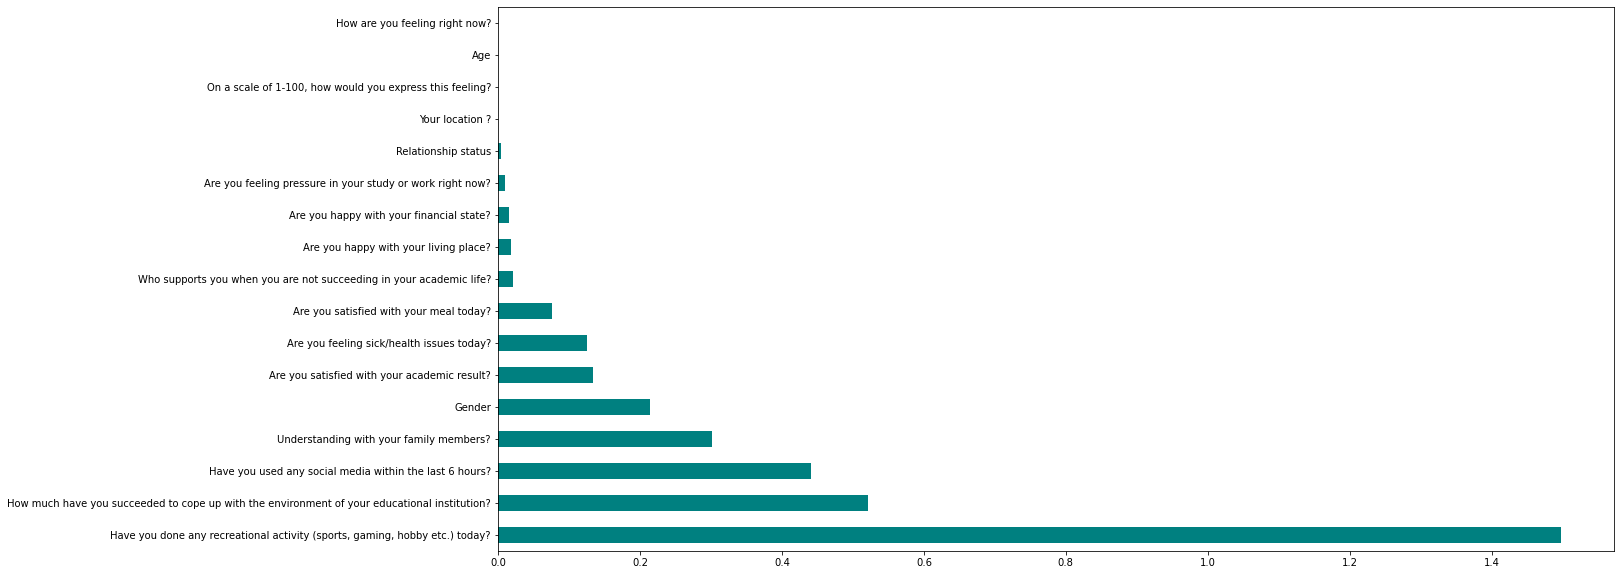

In [7]:
imp_feat_vis=important_features_visualization_classifier(data_final)
imp_feat_vis

In [8]:
important_features=feature_selection_classifier(data_final)
important_features

Index(['Your location ?',
       'Are you feeling pressure in your study or work right now?',
       'Are you satisfied with your meal today?',
       'On a scale of 1-100, how would you express this feeling?',
       'How long did you sleep last night?(in hours)'],
      dtype='object')

### ***Models***

Here I have used:
*   Decision Tree Classifier with both 'Gini' (Default) and 'Entropy', respectively.
*   Tuning The Best Parameter with both Grid Search CV and Randomized Search CV, respectively.



In [9]:
#data_final.head()

In [10]:
X_new=data_final[['Your location ?','Are you feeling pressure in your study or work right now?','Are you satisfied with your meal today?','On a scale of 1-100, how would you express this feeling?','How long did you sleep last night?(in hours)']]
y_new=data_final[['How are you feeling right now?']]

In [11]:
from sklearn.model_selection import train_test_split,cross_val_score,KFold

***Decision Tree Classifier with Gini***

In [12]:
from sklearn.tree import DecisionTreeClassifier

In [13]:
dt=DecisionTreeClassifier()

In [14]:
X_train,X_test,y_train,y_test=train_test_split(X_new,y_new,test_size=0.20,stratify=y_new,random_state=21)

In [15]:
dt.fit(X_train,y_train)

DecisionTreeClassifier()

In [16]:
y_pred_dt_train=dt.predict(X_train)

In [17]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [18]:
accuracy_score(y_train,y_pred_dt_train)

0.9836956521739131

In [19]:
y_pred_dt_test=dt.predict(X_test)

In [20]:
accuracy_score(y_test,y_pred_dt_test)

0.9728260869565217

In [21]:
target_names=['Very Bad','Bad','Normal','Good','Very Good']

In [22]:
print(confusion_matrix(y_test,y_pred_dt_test))

[[33  0  0  0  0]
 [ 0 38  1  0  0]
 [ 0  3 33  0  0]
 [ 0  0  0 33  0]
 [ 0  1  0  0 42]]


In [23]:
print(classification_report(y_test,y_pred_dt_test,target_names=target_names))

              precision    recall  f1-score   support

    Very Bad       1.00      1.00      1.00        33
         Bad       0.90      0.97      0.94        39
      Normal       0.97      0.92      0.94        36
        Good       1.00      1.00      1.00        33
   Very Good       1.00      0.98      0.99        43

    accuracy                           0.97       184
   macro avg       0.98      0.97      0.97       184
weighted avg       0.97      0.97      0.97       184



In [24]:
from sklearn import tree
import matplotlib.pyplot as plt

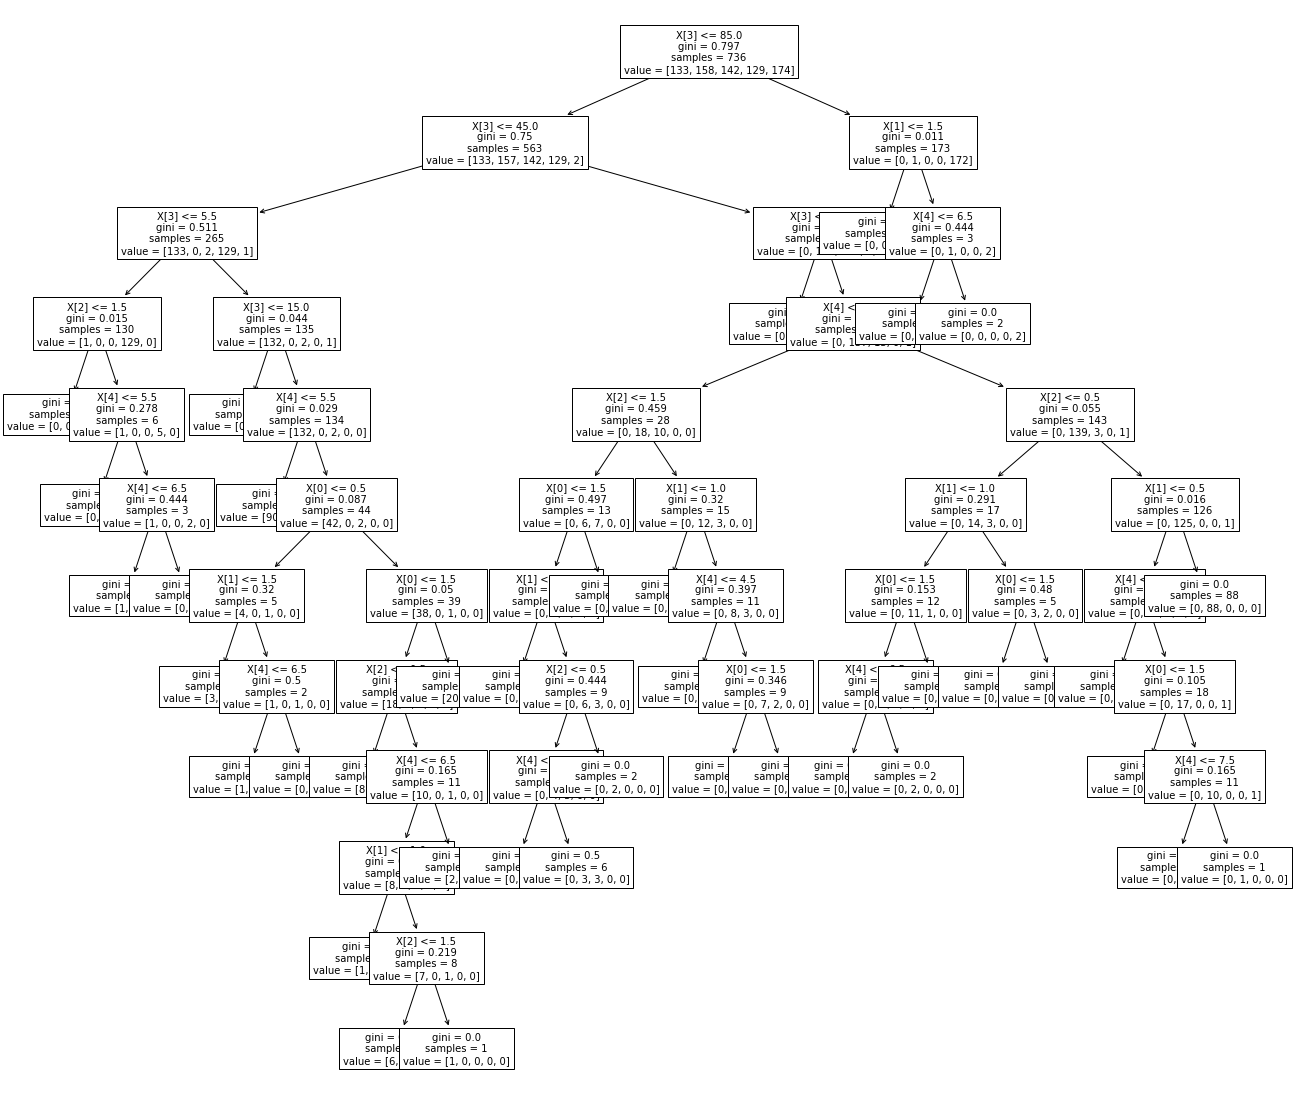

In [25]:
fig, ax = plt.subplots(figsize=(22,20))
tree.plot_tree(dt, fontsize=10)
plt.show()

In [26]:
target=list(df['How are you feeling right now?'].unique())
feature_names = list(X_new.columns)

In [27]:
import pydotplus
from sklearn.tree import export_graphviz

In [28]:
dot_data=export_graphviz(dt,filled=True,rounded=True,feature_names=feature_names,class_names=target,out_file=None,
                          special_characters=True)
pydot_graph = pydotplus.graph_from_dot_data(dot_data)

In [29]:
pydot_graph.set_size('"20,600!"')

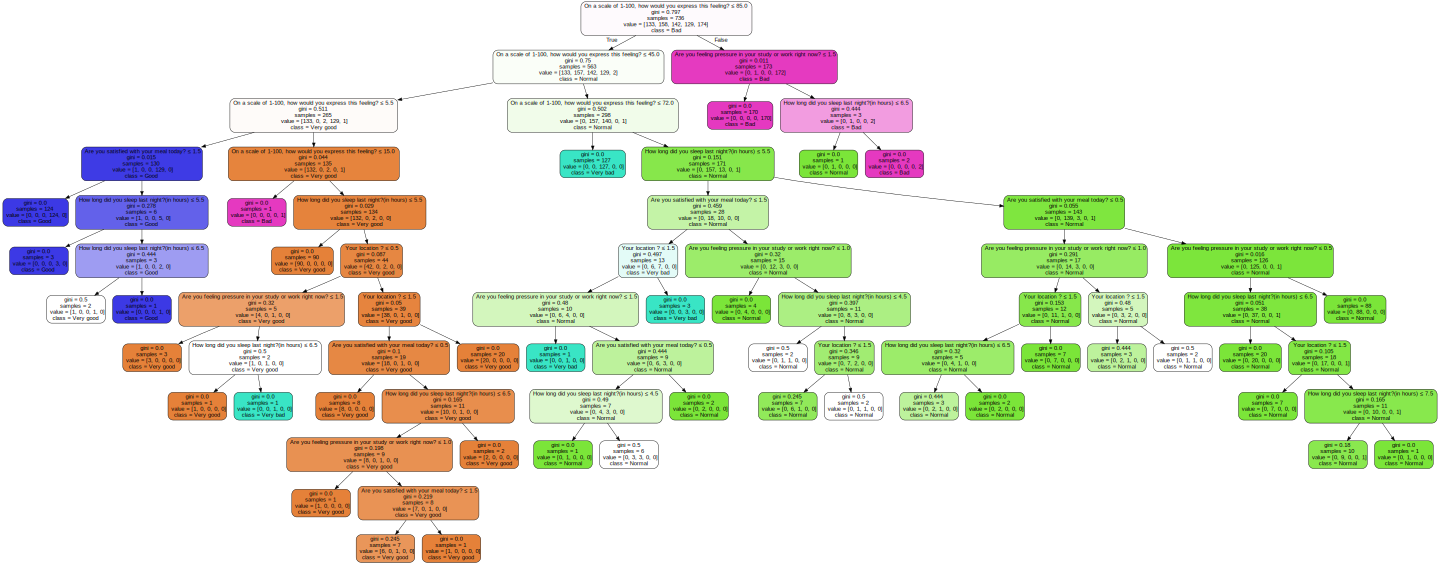

In [30]:
import graphviz
gvz_graph=graphviz.Source(pydot_graph.to_string())
gvz_graph

In [31]:
gvz_graph.save('ml_lab_tree.png')

'ml_lab_tree.png'

In [32]:
print(tree.export_text(dt))

|--- feature_3 <= 85.00
|   |--- feature_3 <= 45.00
|   |   |--- feature_3 <= 5.50
|   |   |   |--- feature_2 <= 1.50
|   |   |   |   |--- class: 3
|   |   |   |--- feature_2 >  1.50
|   |   |   |   |--- feature_4 <= 5.50
|   |   |   |   |   |--- class: 3
|   |   |   |   |--- feature_4 >  5.50
|   |   |   |   |   |--- feature_4 <= 6.50
|   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |--- feature_4 >  6.50
|   |   |   |   |   |   |--- class: 3
|   |   |--- feature_3 >  5.50
|   |   |   |--- feature_3 <= 15.00
|   |   |   |   |--- class: 4
|   |   |   |--- feature_3 >  15.00
|   |   |   |   |--- feature_4 <= 5.50
|   |   |   |   |   |--- class: 0
|   |   |   |   |--- feature_4 >  5.50
|   |   |   |   |   |--- feature_0 <= 0.50
|   |   |   |   |   |   |--- feature_1 <= 1.50
|   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |--- feature_1 >  1.50
|   |   |   |   |   |   |   |--- feature_4 <= 6.50
|   |   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   | 

***Decision Tree Classifier with Entropy***

In [33]:
dt_en=DecisionTreeClassifier(criterion='entropy')

In [34]:
dt_en.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy')

In [35]:
y_pred_dt_en_train=dt_en.predict(X_train)

In [36]:
accuracy_score(y_train,y_pred_dt_en_train)

0.9836956521739131

In [37]:
y_pred_dt_en_test=dt_en.predict(X_test)

In [38]:
accuracy_score(y_test,y_pred_dt_en_test)

0.9728260869565217

In [39]:
print(confusion_matrix(y_test,y_pred_dt_en_test))

[[33  0  0  0  0]
 [ 0 39  0  0  0]
 [ 0  3 33  0  0]
 [ 0  0  0 32  1]
 [ 0  1  0  0 42]]


In [40]:
print(classification_report(y_test,y_pred_dt_en_test,target_names=target_names))

              precision    recall  f1-score   support

    Very Bad       1.00      1.00      1.00        33
         Bad       0.91      1.00      0.95        39
      Normal       1.00      0.92      0.96        36
        Good       1.00      0.97      0.98        33
   Very Good       0.98      0.98      0.98        43

    accuracy                           0.97       184
   macro avg       0.98      0.97      0.97       184
weighted avg       0.97      0.97      0.97       184



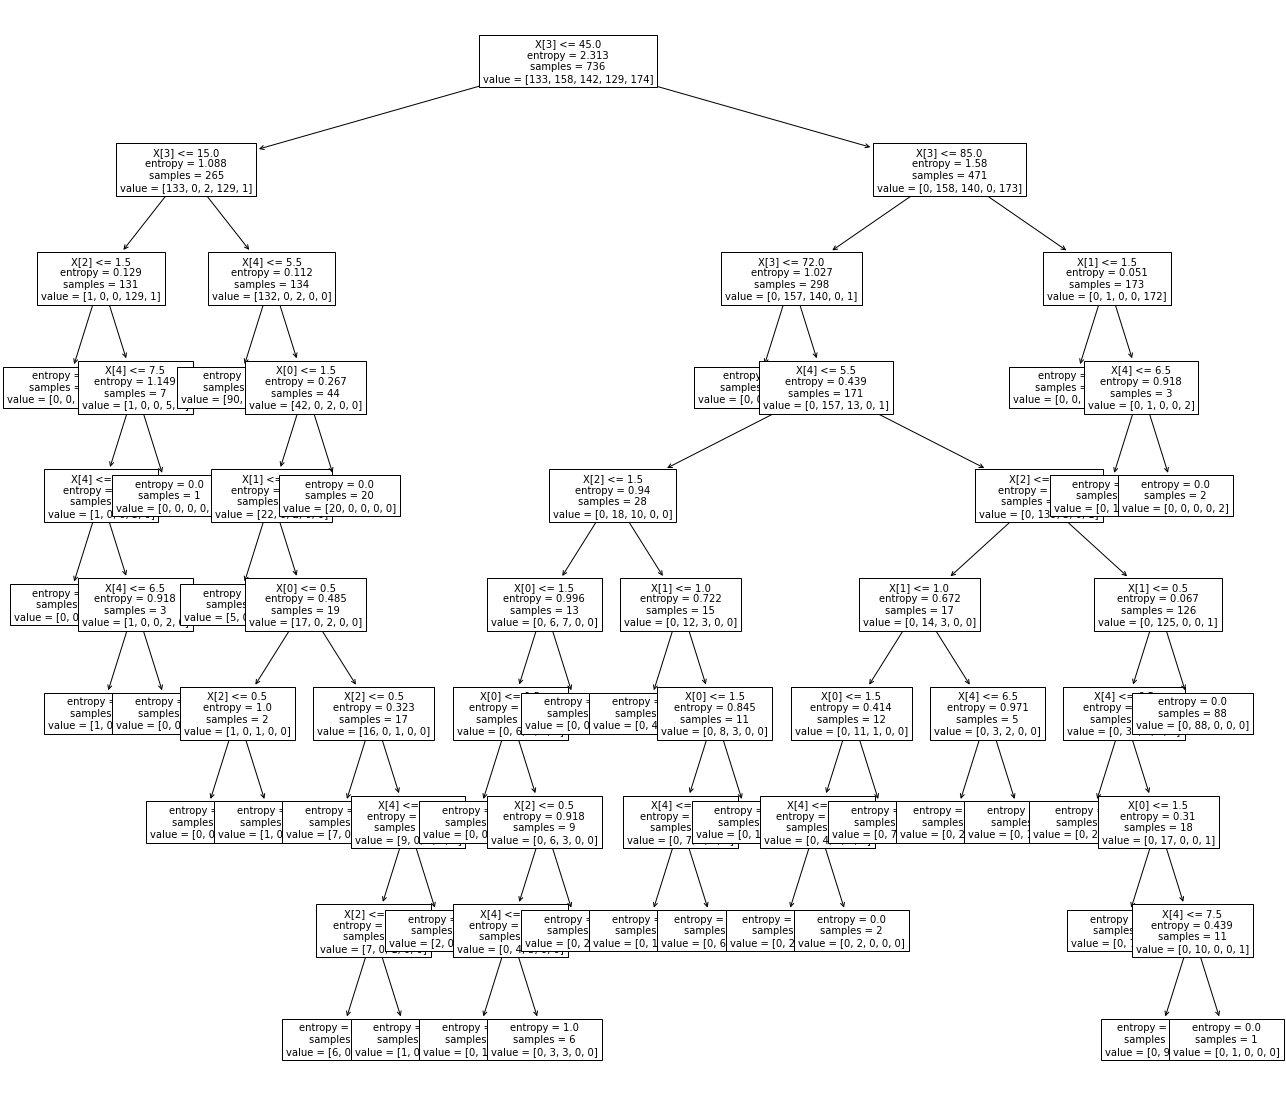

In [41]:
fig, ax = plt.subplots(figsize=(22,20))
tree.plot_tree(dt_en, fontsize=10)
plt.show()

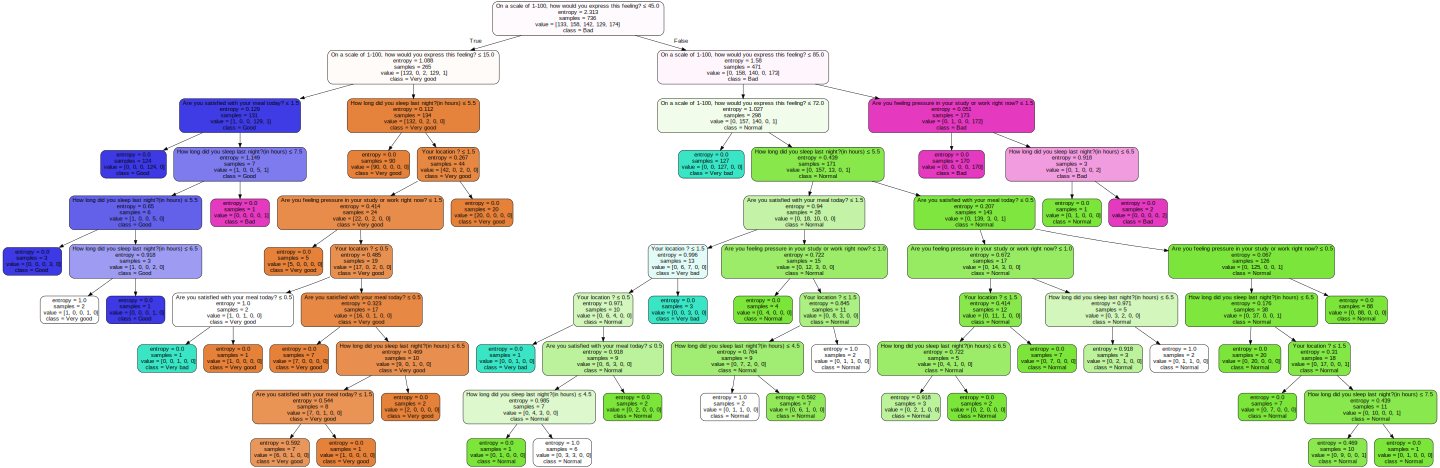

In [42]:
dot_data_en=export_graphviz(dt_en,filled=True,rounded=True,feature_names=feature_names,class_names=target,out_file=None,
                          special_characters=True)
pydot_graph_en=pydotplus.graph_from_dot_data(dot_data_en)

pydot_graph_en.set_size('"20,600!"')
gvz_graph_en=graphviz.Source(pydot_graph_en.to_string())
gvz_graph_en

In [43]:
print(tree.export_text(dt_en))

|--- feature_3 <= 45.00
|   |--- feature_3 <= 15.00
|   |   |--- feature_2 <= 1.50
|   |   |   |--- class: 3
|   |   |--- feature_2 >  1.50
|   |   |   |--- feature_4 <= 7.50
|   |   |   |   |--- feature_4 <= 5.50
|   |   |   |   |   |--- class: 3
|   |   |   |   |--- feature_4 >  5.50
|   |   |   |   |   |--- feature_4 <= 6.50
|   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |--- feature_4 >  6.50
|   |   |   |   |   |   |--- class: 3
|   |   |   |--- feature_4 >  7.50
|   |   |   |   |--- class: 4
|   |--- feature_3 >  15.00
|   |   |--- feature_4 <= 5.50
|   |   |   |--- class: 0
|   |   |--- feature_4 >  5.50
|   |   |   |--- feature_0 <= 1.50
|   |   |   |   |--- feature_1 <= 1.50
|   |   |   |   |   |--- class: 0
|   |   |   |   |--- feature_1 >  1.50
|   |   |   |   |   |--- feature_0 <= 0.50
|   |   |   |   |   |   |--- feature_2 <= 0.50
|   |   |   |   |   |   |   |--- class: 2
|   |   |   |   |   |   |--- feature_2 >  0.50
|   |   |   |   |   |   |   |--- class: 0
| 

### ***Hyperparameter Tuning***

***Gridsearch CV***

In [44]:
from sklearn.model_selection import GridSearchCV

In [45]:
params={
    'max_depth':[5,1],
    'min_samples_leaf':[1,2],
    'criterion':['gini','entropy']
}

In [46]:
tree_grid=DecisionTreeClassifier()

In [47]:
grid_cv=GridSearchCV(tree_grid,params,cv=KFold(n_splits=10,shuffle=True))

In [48]:
grid_cv.fit(X_new,y_new)

GridSearchCV(cv=KFold(n_splits=10, random_state=None, shuffle=True),
             estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'], 'max_depth': [5, 1],
                         'min_samples_leaf': [1, 2]})

In [49]:
print("Tuned Decision Tree Parameters: {}".format(grid_cv.best_params_))

Tuned Decision Tree Parameters: {'criterion': 'gini', 'max_depth': 5, 'min_samples_leaf': 2}


In [50]:
print("Best score is {}".format(grid_cv.best_score_))

Best score is 0.9739130434782609


***Randomizedsearch CV***

In [51]:
from sklearn.model_selection import RandomizedSearchCV

In [52]:
params_random={
    'max_depth':[5,1],
    'min_samples_leaf':[1,2],
    'criterion':['gini','entropy']
}

In [53]:
tree_random=DecisionTreeClassifier()

In [54]:
random_cv=RandomizedSearchCV(tree_random,params_random,cv=KFold(n_splits=10,shuffle=True))

In [55]:
random_cv.fit(X_new,y_new)

C:\Users\Admin\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:285: UserWarning: The total space of parameters 8 is smaller than n_iter=10. Running 8 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


RandomizedSearchCV(cv=KFold(n_splits=10, random_state=None, shuffle=True),
                   estimator=DecisionTreeClassifier(),
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_depth': [5, 1],
                                        'min_samples_leaf': [1, 2]})

In [56]:
print("Tuned Decision Tree Parameters: {}".format(random_cv.best_params_))

Tuned Decision Tree Parameters: {'min_samples_leaf': 2, 'max_depth': 5, 'criterion': 'gini'}


In [57]:
print("Best score is {}".format(random_cv.best_score_))

Best score is 0.9717391304347827


### ***Summary***

In [58]:
print("\n All are looks almost same, no variation.\n")


 All are looks almost same, no variation.

